# Pandas
## Modified from Ian Allison (Compute Canada, 2020)
Pandas (Python Data Analysis Library) is a swiss-army knife module that you'll find at the top of a huge proportion of notebooks. It is so popular that there's even an idiom for how to import it...

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dtrad/ds211_course/blob/master/PandasIntro.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [46]:
# to install uncomment this line or use conda install pandas
#!pip install pandas

In [47]:
import pandas as pd

To get a quick idea of the scope of pandas take a look at the autocomplete for pd.<TAB>

In [48]:
pd.api

<module 'pandas.api' from 'c:\\Users\\danie\\Anaconda3\\envs\\tfgpu3\\lib\\site-packages\\pandas\\api\\__init__.py'>

The fundamental objects in pandas are the Series and the DataFrame. Together they encapsulate how you will normally ingest, clean, manipulate and even visualize external data sources. Most of your work will use methods on these 
objects so we'll take a quick tour of the concepts they implement, and the idea of an Index.

## Series
The pandas Series object is basically a one dimensional indexed array. Unpacking that, it is something that will look like

| Index | Value |
|-------|-------|
|   0   |  0.12 |
|   1   |  0.24 |
|   2   |  0.36 |
|   3   |  0.48 |

One thing to notice is that the values are all of the same time (floating point here). The index is fairly flexible, it might be numbers (as here), strings, timestamps or something else. The main restriction is that they should be hashable. Let's create some series to play with

In [49]:
# sf a series of floats from 1.0 to 5.0
sf = pd.Series([1,2,3,4,5],dtype='float32')
print(type(sf),sf)
# si a series of integers from 0 to 5
si = pd.Series(range(5),dtype='int32')
print(type(si),si)

<class 'pandas.core.series.Series'> 0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float32
<class 'pandas.core.series.Series'> 0    0
1    1
2    2
3    3
4    4
dtype: int32


The `__repr__` includes the values we set along with the type of object we have stored (the values). As I mentioned, this is one of the attributes of a Series

In [50]:
# Check `.dtype` of sf and si
sf.dtype,si.dtype

(dtype('float32'), dtype('int32'))

So far, this looks a lot like a list, but we can switch the indexing to suit our needs, by explicitly passing the `index=` argument

In [51]:
# sm a series of 5 floats with the index being their values as words
sm = pd.Series([1,2,3,4,5],dtype='float32',index=['one','two','three','four','five'])
sm

one      1.0
two      2.0
three    3.0
four     4.0
five     5.0
dtype: float32

Now the series is starting to look more like a dictionary, in fact, that's a pretty good way to construct series

In [52]:
# sn a series created from a dictionary
sn = pd.Series({'one':1,'two':2,'three':3,'four':4,'five':5},dtype='int')
print(sn)

one      1
two      2
three    3
four     4
five     5
dtype: int32


When you look closely though, a Series has a few tricks that a dictionary doesn't...

In [53]:
# Try slicing sn
print(sn['three':'five'])
print(sn[3:5])

three    3
four     4
five     5
dtype: int32
four    4
five    5
dtype: int32


Notice that label based indexes are _inclusive_ of the `stop` value. This is different from most other indexes you'll see in python. This can be a little confusion, but it basically boils down to the idea that there isn't always a natural "next" object in a hash


In [54]:
sn.keys()
'four' in sn


True

In [55]:
# show the `.keys` of sn
sn.keys()
# Check if 'four' is in the series index
'four' in sn

True

Element by element statements evaluate to Booleans

In [56]:
# Check where sn > 2
print(sn > 2)

# Extract the values where sn > 2
print()
print(sn[sn > 2])

one      False
two      False
three     True
four      True
five      True
dtype: bool

three    3
four     4
five     5
dtype: int32


There are also some indexing methods available to you `.loc`, `.iloc`, `.ix`. These might seem redundant, but actually they're useful in some contexts where ordinary indexing will bite you...

In [57]:
sa = pd.Series(data=['apple', 'orange', 'pineapple'], index=[1, 3, 7])
sa

1        apple
3       orange
7    pineapple
dtype: object

In [58]:
sa[3]

'orange'

In [59]:
sa[:3]

1        apple
3       orange
7    pineapple
dtype: object

When actually, you probably meant...

In [60]:
sa.loc[:3]

1     apple
3    orange
dtype: object

`iloc` does the opposite and tells pandas you want to use the implicit style python notation

In [61]:
sa.iloc[:2]

1     apple
3    orange
dtype: object

## DataFrames

Most of the time you will be using DataFrames rather than series, but dataframes can be thought of as collections of Series. They can actually be multidimensional, but for now think of them as a collection of `Series` columns

In [62]:
d1 = pd.DataFrame({'floats': sm, 'ints': sn})
d1

# Check the index and colums of d1

,floats,ints
one,1.0,1
two,2.0,2
three,3.0,3
four,4.0,4
five,5.0,5


When indexing a dataframe, the default is to give you the column

In [63]:
# Display the 'ints' column of d1
print(d1['ints'])

# Check the type of the object you get back from this indexing
type(d1['ints'])

one      1
two      2
three    3
four     4
five     5
Name: ints, dtype: int32


pandas.core.series.Series

If you are looking for the row, then try `.loc` with the row index value

In [64]:
# Get the `one` row of d1
d1.loc['one']

floats    1.0
ints      1.0
Name: one, dtype: float64

You can also specify columns using the attribute notation...

In [65]:
# Show the `.ints` column of d1
d1.ints

one      1
two      2
three    3
four     4
five     5
Name: ints, dtype: int32

### Adding Columns
We can manipulate existing columns or create new ones, but simple transformations will return the transformed object rather than modifying in place. Many options have an `inplace=True` argument, but you can also just reassign the returned DataFrame to the same name.

When you slice or subset, pandas will usually try to get away with giving you a view on the existing dataframe rather than giving you a new object. This is cheaper in terms of memory allocated and also performance penalty of the copies, sometimes 

In [66]:
# Double the d1['ints'] column
d1['ints']*2
# Check that d1 is unchanged
print(d1)
# divide the ints column of d1 by twice the floats column
d1['ints']/(2*d1['floats'])

       floats  ints
one       1.0     1
two       2.0     2
three     3.0     3
four      4.0     4
five      5.0     5


one      0.5
two      0.5
three    0.5
four     0.5
five     0.5
dtype: float64

### DataFrame Attributes

We've already seen some of the attributes of the DataFrame (column etc.) but there are quite a few available, take a look at `dtypes`, `ndim`, `shape`

In [67]:
print(d1.dtypes)
print()
print(d1.ndim)
print()
print(d1.shape)


floats    float32
ints        int32
dtype: object

2

(5, 2)


### DataFrame Methods

There are *lots* of methods for operating on DataFrames, have a look at the tab completion and explore the documentation for them. In particular, take a look at the help for `describe`, `head` and `tail`. These are great for orienting yourself with a new dataset

In [68]:
# Describe the d1 DataFrame
d1.describe()

,floats,ints
count,5.000000,5.000000
mean,3.000000,3.000000
std,1.581139,1.581139
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


## Working with External Data

Data comes in many, many forms from simple csv/json files, real-time APIs, structured binary files and many others. Try pd.read_<TAB> to see some of the available options. `read_csv` and `read_json` are the workhorses. We'll start with pd.read_csv which is more fexible but many of the arguments to read_csv will have equivalents for the other functions. `read_json` can be useful for quicky interacting with public APIs which will commonly publish JSON endpoints.
    
    
We need a CSV to work with. The city of Vancouver has an [open data catalog](https://vancouver.ca/your-government/open-data-catalogue.aspx), which has CSV for some of the datasets. You can download the file directly if you want, e.g.
    
!curl -O ftp://webftp.vancouver.ca/OpenData/csv/CommunityGardensandFoodTrees.csv

but `read_csv` will also happily read from remote for you

In [69]:
gardenDF = pd.read_csv(
    "ftp://webftp.vancouver.ca/OpenData/csv/CommunityGardensandFoodTrees.csv",
    encoding='latin1'
)
gardenDF.shape

(178, 19)

So there are 168 rows, with 19 columns, here are the first few rows

In [70]:
gardenDF.head()

,MAPID,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,LATITUDE,LONGITUDE,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE
0,FA001,Pre-2010,0 - Private Developments - Community Shared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN
1,FA002,2014,15th Avenue Coop,1255.0,E,15th,Av,"1255 E 15th Av, Vancouver, BC",49.257119,-123.078839,8.0,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN
2,FA003,2008,16 Oaks,1018.0,W,16th,Av,"1018 W 16th Av, Vancouver, BC",49.256748,-123.127664,55.0,NaN,NaN,NaN,NaN,Private,NaN,oak.16th.garden@gmail.com,NaN
3,FA004,2007,1755 West 14th - Private apartment building ga...,1755.0,W,14th,Av,"1755 W 14th Av, Vancouver, BC",49.259050,-123.144870,NaN,NaN,NaN,NaN,NaN,Private,Apartment residents,NaN,NaN
4,FA183,2019,221A,271.0,NaN,Union,Street,"271 Union Street, Vancouver, BC",49.277888,-123.097379,10.0,NaN,NaN,NaN,NaN,NaN,NaN,info@semi-public.com,http://semi-public.com


In [71]:
gardenDF.describe()

,STREET_NUMBER,LATITUDE,LONGITUDE,NUMBER_OF_PLOTS
count,163.000000,170.000000,170.000000,167.000000
mean,2496.840491,49.256424,-123.099438,30.000000
std,2166.223946,0.022280,0.043630,50.376295
min,1.000000,49.205877,-123.214422,0.000000
25%,857.000000,49.241868,-123.129996,5.000000
50%,2021.000000,49.261981,-123.094987,12.000000
75%,3349.000000,49.272202,-123.064578,38.000000
max,8725.000000,49.293672,-123.024394,507.000000


So we know when the gardens were created (`YEAR_CREATED`), and where the are (`LATITUDE`, `LONGITUDE`).

Now it is time to clean the data. This is a hugely important step and in research will eat a lot of your time, but it can be worth it. First let's look at the index, the default is to index by integer, but we could have picked any column instead. It looks like the first column is unique (`MAPID`) and so let's use that (chosing the index right can make your life much easier when adding data or combining multiple DataFrames). The `inplace=True` argument means modify the existing dataframe rather than returning a modified copy

In [72]:
gardenDF.head(3)

,MAPID,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,LATITUDE,LONGITUDE,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE
0,FA001,Pre-2010,0 - Private Developments - Community Shared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN
1,FA002,2014,15th Avenue Coop,1255.0,E,15th,Av,"1255 E 15th Av, Vancouver, BC",49.257119,-123.078839,8.0,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN
2,FA003,2008,16 Oaks,1018.0,W,16th,Av,"1018 W 16th Av, Vancouver, BC",49.256748,-123.127664,55.0,NaN,NaN,NaN,NaN,Private,NaN,oak.16th.garden@gmail.com,NaN


In [73]:
# `.set_index` to mapID in place
gardenDF.set_index('MAPID', inplace=True)

In [74]:
gardenDF.head(2)

,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,LATITUDE,LONGITUDE,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE
MAPID,,,,,,,,,,,,,,,,,,
FA001,Pre-2010,0 - Private Developments - Community Shared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN
FA002,2014,15th Avenue Coop,1255.0,E,15th,Av,"1255 E 15th Av, Vancouver, BC",49.257119,-123.078839,8.0,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN


In [75]:

# Use the `.unique` method on the `YEAR_CREATED` column
gardenDF['YEAR_CREATED'].unique()

array(['Pre-2010', '2014', '2008', '2007', '2019', '2017', '2016', '2011',
       nan, '2010', '2015', '2012', '2018', 'pre-1970', '2013', '2009',
       '1993', '2006', '1992', '1995', '1942', '1996', '1986', 'pre 2000',
       '2003', '1985', '1988', '1978', '1990', '2002', '1999'],
      dtype=object)

In [76]:
gardenDF.head(2)

,YEAR_CREATED,NAME,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,MERGED_ADDRESS,LATITUDE,LONGITUDE,NUMBER_OF_PLOTS,NUMBER_OF_FOOD_TREES,NOTES,FOOD_TREE_VARIETIES,OTHER_FOOD_ASSETS,JURISDICTION,STEWARD_OR_MANAGING_ORGANIZATION,PUBLIC_E_MAIL,WEBSITE
MAPID,,,,,,,,,,,,,,,,,,
FA001,Pre-2010,0 - Private Developments - Community Shared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN
FA002,2014,15th Avenue Coop,1255.0,E,15th,Av,"1255 E 15th Av, Vancouver, BC",49.257119,-123.078839,8.0,NaN,NaN,NaN,NaN,Private,NaN,NaN,NaN


`Pre-2010`, `pre-1970` and `pre 200` are kind of usless (and inconsistent!) so let's toss them

In [77]:
for badLabel in ['Pre-2010', 'pre-1970', 'pre 2000']:
    gardenDF = gardenDF[gardenDF['YEAR_CREATED'] != badLabel]

# Check the unique values in `YEAR_CREATED` again

In [78]:
gardenDF.shape

(174, 18)

There's still a `nan`, and the years are strings (numbers would be better or even dates). Pandas is pretty smart about dealing with missing data, but when it gets in the way there are functions like dropna() which will tell pandas to remove them. If we try to convert the `YEAR_CREATED` column to an integer blindly, it will barf on the `nan`.

In [79]:
# Use the `.dropna` and `astype` methods to make everything in YEAR_CREATED an integer
gardenDF = gardenDF[gardenDF['YEAR_CREATED'].notnull()]
#gardenDF=gardenDF.dropna()
gardenDF['YEAR_CREATED']=gardenDF['YEAR_CREATED'].astype(int)

notice that we still have a `NaN` (formally, `NaN` is a float so our column was "promoted"). One of the Big advantages of Pandas is that it will do something sensible with missing data rather than just barfing.

In [80]:
gardenDF['YEAR_CREATED'].describe()

count     155.000000
mean     2009.303226
std         9.212762
min      1942.000000
25%      2008.000000
50%      2011.000000
75%      2014.000000
max      2019.000000
Name: YEAR_CREATED, dtype: float64

Let's get a bit more visual, again notice that the `NaN` is just safely ignored.

<AxesSubplot:>

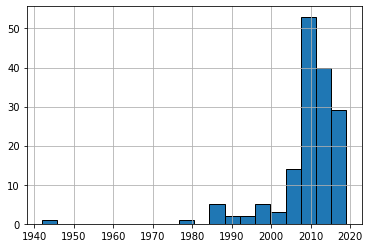

In [85]:
gardenDF.YEAR_CREATED.hist(bins=20,edgecolor='black')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  5.,  2.,
         2.,  5.,  3., 14., 53., 40., 29.]),
 array([1942.  , 1945.85, 1949.7 , 1953.55, 1957.4 , 1961.25, 1965.1 ,
        1968.95, 1972.8 , 1976.65, 1980.5 , 1984.35, 1988.2 , 1992.05,
        1995.9 , 1999.75, 2003.6 , 2007.45, 2011.3 , 2015.15, 2019.  ]),
 <BarContainer object of 20 artists>)

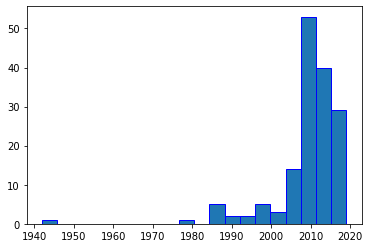

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
# Create a histogram of the YEAR_CREATED
plt.figure()
plt.hist(gardenDF.YEAR_CREATED,bins=20,edgecolor='b')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  5.,  2.,
         2.,  5.,  3., 14., 53., 40., 29.]),
 array([1942.  , 1945.85, 1949.7 , 1953.55, 1957.4 , 1961.25, 1965.1 ,
        1968.95, 1972.8 , 1976.65, 1980.5 , 1984.35, 1988.2 , 1992.05,
        1995.9 , 1999.75, 2003.6 , 2007.45, 2011.3 , 2015.15, 2019.  ]),
 <BarContainer object of 20 artists>)

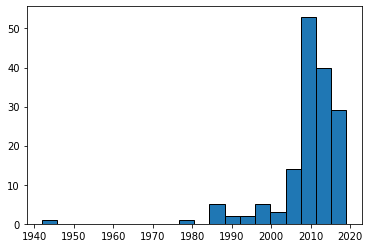

In [86]:
# OOP syntaxis
fig, ax = plt.subplots()
ax.hist(gardenDF.YEAR_CREATED,bins=20,edgecolor='k')

Many of pandas ingenstion methods will let you do the transformations when you first read in the data by passing arguments to `read_csv` (or `read_json`, ...). Some of the more useful options are

  * **delimiter=**: Sometimes a csv is a tsv, tabs are evil
  * **names=**: Pass a list of names to use for the columns
  * **usecols=**: Only slurp up a subset of columns
  * **skiprows=**: Ignore a number of rows at the top of the file
  * **na_values=**: Flag values which the CSV author used to indicate missing data, e.g. -1
  * **encoding=**: ...
  * **converters=**: Do some transformation on the columns before importing them
  * **parse_dates**=: Turn strings into dates
  
For the last two options you normally have to add a bit of logic to help pandas. For dates this might be because you  columns for years, months and days and you need to combine them, or you have to look for a timezone or something. This seems like a hassle, but it is usually worth it. Once you have a column (or an index) as a datetime object you can index it very flexibly (e.g. you can ask for all the rows which fall on a weekend in the PTD timezone)

In [87]:
gardenDF = pd.read_csv(
    "ftp://webftp.vancouver.ca/OpenData/csv/CommunityGardensandFoodTrees.csv",
    encoding='latin1',
    na_values={'YEAR_CREATED': ['Pre-2010', 'pre-1970', 'pre 2000', 'nan']},
    index_col='MAPID',
    dtype={'YEAR_CREATED': float}
)
#gardenDF['YEAR'] = pd.to_datetime(gardenDF['YEAR_CREATED'], format='%Y.0')
#gardenDF[['YEAR_CREATED', 'YEAR']].head()

In [88]:
# Check the `NAME` of the gardens created before 1950
gardenDF[gardenDF['YEAR_CREATED'] < 1950]['NAME']

MAPID
FA007    East Boulevard Allotment Plots
Name: NAME, dtype: object

## TimeSeries

We've already talked about time and date handling a bit, but I use this a lot, so we can talk about it more! Pandas was created to handle Financial data and do financial modeling. This lineage has given pandas really excellent time handling. The main objects are

  * **Time Stamps**: Specific points in time usually recorded to the second or nanosecond
  * **Time Intervals/Time Deltas**: These types lets you do arithmetic on time objects

We need some dates to play with. There's a convenience function called `to_datetime` which can convert many "human readable" dates to a pd.Timestamp object

In [89]:
moonwalk = pd.to_datetime('July 20, 1969, 20:17 UTC')
moonwalk

Timestamp('1969-07-20 20:17:00+0000', tz='UTC')

Timestamps have attributes which let you extract days, year, etc. Normally these will be reported as numbers, but the strftime method supports the usual format specifiers (The correspond with the libc specifiers, here's a reference http://strftime.org/)

In [90]:
print(f"The moon walk took place on a {moonwalk.strftime('%A')}")

The moon walk took place on a Sunday


In [94]:
# Use pd.datetime.now() to find out how long ago the Apollo 11 moon walk was
# see also `from dateutil import relativedelta`
from datetime import datetime
pd.to_datetime(datetime.now(), utc=True) - moonwalk

Timedelta('19965 days 20:14:05.110465')

Let's look at another sample dataset, it contains three colums

  * year
  * month
  * passengers
  
We can combine the year and month to create a date, then we can use the result as the index for a single column dataframe

In [96]:
flightsDF = pd.read_csv(
    'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv',
    parse_dates=[['year','month']],
    index_col='year_month'
)
flightsDF.head()

,passengers
year_month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [97]:
flightsDF.tail()

,passengers
year_month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [98]:
# Check the dtypes of the DataFrame
flightsDF.dtypes

passengers    int64
dtype: object

Now we can index based on date. Let's look at the number of flights in the 1951

<AxesSubplot:xlabel='year_month'>

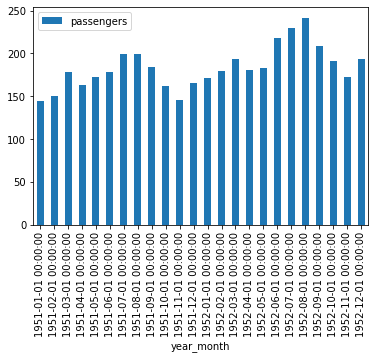

In [99]:
# Select the flights between 1951 and 1952 and plot as a bar graph
flightsDF['1951':'1952'].plot(kind='bar')

Timestamp objects can also deal with arithmetic

In [100]:
# Compare the last and first elements of the index to find out the time range of the data
flightsDF.index[-1] - flightsDF.index[0]

Timedelta('4352 days 00:00:00')

One extremely useful feature with time series is the ability to resample existing time series. For example, we could resample the flight data into year long bins and look at how the mean passenger count increased

<AxesSubplot:xlabel='year_month'>

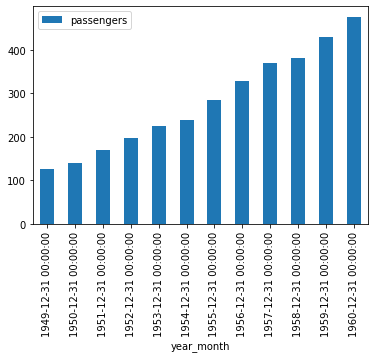

In [101]:
# Resample flightsDF as yearly data, find the mean number of passengers and do another bar plot
flightsDF.resample('Y').mean().plot(kind='bar')

## Grouping, Joining, Concatenating

You can get pretty far by jamming everything into a single dataframe, but sometimes you might want to do aggregate operations within a dataframe (e.g. group together all of the rows by year and show the mean value of some other column). Alternatively you might want to add new rows to or columns to an existing DataFrame or join dataframes based on shared key.


## Concatenate & Join

There are a handful of functions which handle concatenation. The main workhorse is `pd.concat`, but there are some convenience functions which will let you avoid passing lots of arguments to concat. You can combine `Series` and `DataFrames` but we'll jump straight to `DataFrames`,

In [103]:
s1 = pd.DataFrame(
    {
        'upper': ['A', 'B', 'C'], 
        'lower': ['a', 'b', 'c']
    }, 
    columns=['upper', 'lower'], 
    index=[1,2,3]
)
print(s1)
s2 = pd.DataFrame(
    {
        'upper': ['D', 'E', 'F'],
        'lower': ['d', 'e', 'f']
    }, 
    columns=['upper', 'lower'],
    index=[4,5,6]
)
print(s2)
pd.concat([s1,s2])

  upper lower
1     A     a
2     B     b
3     C     c
  upper lower
4     D     d
5     E     e
6     F     f


,upper,lower
1,A,a
2,B,b
3,C,c
4,D,d
5,E,e
6,F,f


Notice that we enclosed the thigs we want to join as some sort of iterable (a `list` here). What happens if one of the columns is missing from the data frame?

What if we wanted to add columns rather than rows

In [104]:
t1 = pd.DataFrame({'upper': ['A', 'B', 'C'], 'lower': ['a', 'b', 'c']}, columns=['upper', 'lower'], index=[1,2,3])
t2 = pd.DataFrame({'greek': ['α', 'β', 'γ']}, index=[1,2,3])

pd.concat([t1, t2], axis='columns')

,upper,lower,greek
1,A,a,α
2,B,b,β
3,C,c,γ


`pd.concat` will accept duplicate indices, but normally that indicates a problem with the data normalization. `concat` has a `verify_index` argument which can check for these problems and you can specify what you want to do with duplicates manually.

concat will often result in `NaN`s because some columns might not exist in both/all frames.

In [105]:
d4 = pd.DataFrame({'fruit': ['apple', 'orange'], 'veg': ['brocolli', 'carrot'], 'tree': ['cedar', 'alder']})
d5 = pd.DataFrame({'veg': ['onion', 'potato'], 'fruit': ['banana','grape']})
pd.concat([d4,d5], sort=False, ignore_index=True)

,fruit,veg,tree
0,apple,brocolli,cedar
1,orange,carrot,alder
2,banana,onion,NaN
3,grape,potato,NaN


Since the index wasn't important here, I threw it away and just accepted a new one.

In the general case, joining DataFrames can get complex. The concat method can take a `join` keyword to specify a database like join stragegy (inner or outer), but `pd.merge` is a bit more flexible. It implements the usual relations

  * one-to-one (similar to a concat)
  * many-to-one
  * many-to-many
  
For the many-to-one case here is an example

In [106]:
adf1=pd.DataFrame({
    'class': ['insect', 'spider'], 
    'legs': [6, 8]}
)

adf2=pd.DataFrame({
    'name': ['molly', 'anna', 'stephen', 'mica'], 
    'class': ['insect','insect','spider','insect']}
)                     

print(adf1); print(adf2)

    class  legs
0  insect     6
1  spider     8
      name   class
0    molly  insect
1     anna  insect
2  stephen  spider
3     mica  insect


In [107]:
pd.merge(adf1, adf2)

,class,legs,name
0,insect,6,molly
1,insect,6,anna
2,insect,6,mica
3,spider,8,stephen


The _many-to-one_ is many different rows in adf2 being mapped to a single row in adf1 (insects). `pd.merge` also accepts a selection of keyword arguments so you can manually specify which columns to join, patch up name differences etc.